# Exploratory Data Analysis  
## Global YouTube Statistics 2023

**Author:** João Victor Assunção Pereira 
**Objective:** Explore and analyze global YouTube channel statistics to identify patterns, trends and insights.


## 1. Imports and Configuration

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

## 2. Data Loading
The dataset is not encoded in UTF-8. Therefore, the file was loaded using Latin-1 encoding to avoid decoding errors.

In [2]:
df = pd.read_csv(
    "../data/raw/Global YouTube Statistics.csv",
    encoding="latin1"
)



In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

**We can see that this is a small dataset, but our main goal is to EDA it, so that shouldn't be a problem.**

In [4]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

Main Metrics should be:
subscribers 
video views 
uploads

In [5]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


## 3. Data Overview

The dataset contains 995 YouTube channels with 28 features, including channel performance metrics, content categories, geographic information and estimated earnings.

Some variables contain missing values, especially those related to country-level information and recent performance metrics. These issues will be addressed in the data cleaning step.


Missing Values Calculation Methodology

The percentage of missing values was calculated by converting null values into boolean indicators and computing their mean.
Since boolean values are treated as binary (1 for missing, 0 for non-missing), the mean directly represents the proportion of missing data in each feature.


In [6]:
(df.isna().mean() * 100).sort_values(ascending = False)


subscribers_for_last_30_days               33.869347
Longitude                                  12.361809
Latitude                                   12.361809
Urban_population                           12.361809
Unemployment rate                          12.361809
Population                                 12.361809
Gross tertiary education enrollment (%)    12.361809
Country                                    12.261307
Abbreviation                               12.261307
country_rank                               11.658291
video_views_for_the_last_30_days            5.628141
category                                    4.623116
channel_type_rank                           3.316583
channel_type                                3.015075
created_date                                0.502513
created_month                               0.502513
created_year                                0.502513
video_views_rank                            0.100503
rank                                        0.

### Key Findings from Missing Data Analysis

The highest proportion of missing values is observed in `subscribers_for_last_30_days`, indicating limited availability of recent growth data for a subset of channels.

A consistent missing pattern (~12%) appears across country-level socioeconomic and geographic variables, suggesting a structural dependency on the availability of country information.

Core performance metrics such as subscribers, views and earnings show no missing values, indicating strong reliability for primary analytical objectives.


## 4. Column Standardization

To improve readability and code consistency, column names were standardized using snake_case format.

In [7]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.replace("%", "pct")
)
df.columns

Index(['rank', 'youtuber', 'subscribers', 'video_views', 'category', 'title',
       'uploads', 'country', 'abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'gross_tertiary_education_enrollment_pct', 'population',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude'],
      dtype='object')

### Result

After standardization, column names are easier to reference, consistent across the dataset and aligned with industry best practices.
This step also simplifies future feature engineering and visualization tasks.


## 5. Univariate Analysis

This section focuses on analyzing individual variables to understand their distributions, detect potential outliers, and identify patterns that may impact further analysis.


### 5.1 Numerical Features Overview

Given the nature of digital platforms, metrics such as subscribers and views tend to present heavy right-skewed distributions, where a small number of channels concentrate most of the volume.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video_views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   country                                  873 non-null    object 
 8   abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [9]:
numeric_cols = [
    "subscribers",
    "video_views",
    "uploads",
    "lowest_yearly_earnings",
    "highest_yearly_earnings"
]

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,12300000.0,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video_views,995.0,1.103954e+10,1.411084e+10,0.0,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.0,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
lowest_yearly_earnings,995.0,4.422574e+05,8.612161e+05,0.0,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07
highest_yearly_earnings,995.0,7.081814e+06,1.379704e+07,0.0,5.217500e+05,2.600000e+06,7.300000e+06,1.634000e+08


### 5.2 Distribution of Subscribers

Subscribers represent the primary measure of channel popularity. Due to the presence of extremely large channels, the distribution is expected to be highly skewed.


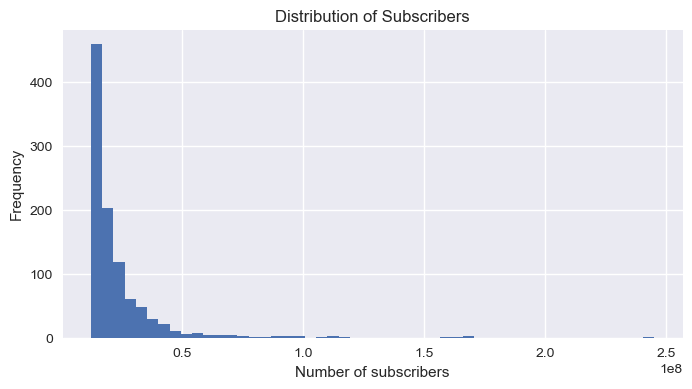

In [10]:
plt.figure(figsize=(8,4))
plt.hist(df['subscribers'], bins = 50)
plt.xlabel("Number of subscribers")
plt.ylabel("Frequency")
plt.title("Distribution of Subscribers")
plt.show()

To better visualize the distribution, a logarithmic scale is applied, which allows a clearer comparison across different magnitudes.


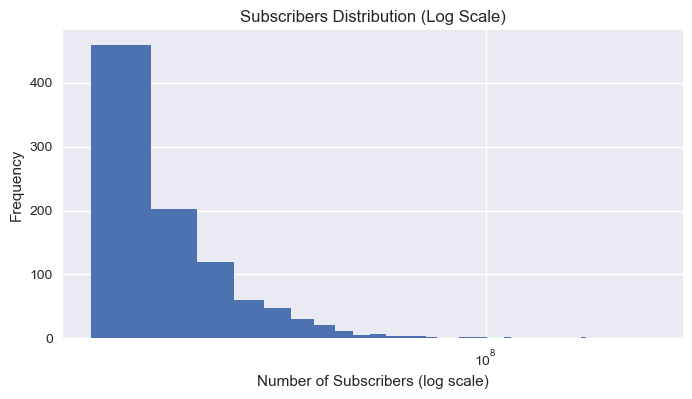

In [11]:
plt.figure(figsize=(8, 4))
plt.hist(df["subscribers"], bins=50)
plt.xscale("log")
plt.xlabel("Number of Subscribers (log scale)")
plt.ylabel("Frequency")
plt.title("Subscribers Distribution (Log Scale)")
plt.show()


Most channels have a low to intermediate amount of subscribers (we can see the "long tail" structure), few are on top.
While logarithmic scaling may reduce the visual perception of absolute differences, it provides a clearer understanding of the underlying distribution structure, especially in datasets characterized by extreme skewness.
For this reason, both linear and logarithmic perspectives are useful depending on the analytical objective.


### 5.3 Earnings Distribution

Yearly earnings are presented as estimated ranges, reflecting the variability in monetization across channels.


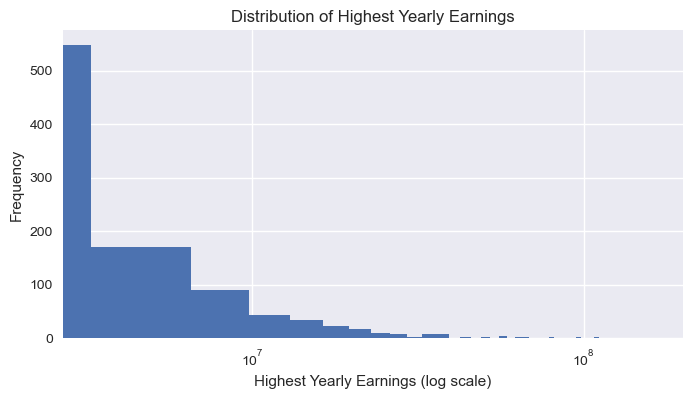

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(df["highest_yearly_earnings"], bins=50)
plt.xscale("log")
plt.xlabel("Highest Yearly Earnings (log scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Highest Yearly Earnings")
plt.show()


### Key Insights from Numerical Analysis

- The majority of YouTube channels operate within moderate subscriber ranges.
- A small number of channels account for extremely high subscriber and earnings values, indicating a strong power-law distribution.
- Logarithmic scaling is essential for meaningful visualization of platform metrics.


## 6. Categorical Analysis

This section explores categorical features to identify dominant content types, channel structures, and geographic concentration among top YouTube channels.


### 6.1 Channel Categories Distribution

Analyzing channel categories helps identify which content types are most prevalent among top-performing channels.
Missing values in the `category` feature were excluded from this specific analysis, as they do not represent actual content categories and would not contribute meaningful insights to the distribution of channel types.


In [13]:
category_counts = (
    df["category"].value_counts(dropna=True).to_frame(name='count')
)
category_counts['percentage'] = (
    (category_counts['count'] / len(df) * 100).round(2)
)

top_categories = category_counts.head(10)
top_categories

,count,percentage
category,,
Entertainment,241,24.22
Music,202,20.30
People & Blogs,132,13.27
Gaming,94,9.45
Comedy,69,6.93
Film & Animation,46,4.62
Education,45,4.52
Howto & Style,40,4.02
News & Politics,26,2.61


Let's make graphic of this table.

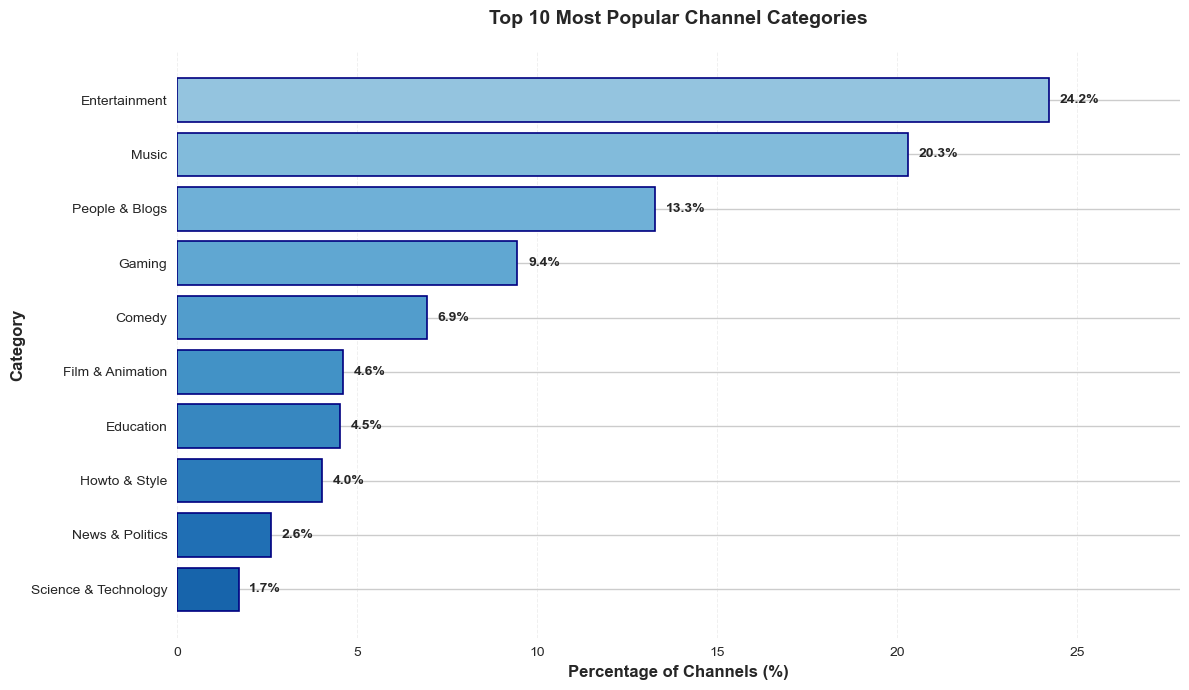

In [14]:

# Set Seaborn style for a more modern look
sns.set_style("whitegrid")

# Define custom colors (blue gradient)
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_categories)))

# Create figure with larger size
plt.figure(figsize=(12, 7))

# Create horizontal bar chart
bars = plt.barh(top_categories.index, 
                top_categories["percentage"],
                color=colors,
                edgecolor='navy',
                linewidth=1.2)

# Add values on the bars
for i, value in enumerate(top_categories["percentage"]):
    plt.text(value + 0.3, i, f'{value:.1f}%', 
             va='center', fontsize=10, fontweight='bold')

# Customize axes
plt.xlabel("Percentage of Channels (%)", fontsize=12, fontweight='bold')
plt.ylabel("Category", fontsize=12, fontweight='bold')
plt.title("Top 10 Most Popular Channel Categories", 
          fontsize=14, fontweight='bold', pad=20)

# Invert Y axis to show highest at the top
plt.gca().invert_yaxis()

# Add subtle grid only on X axis
plt.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)

# Adjust X axis limits to make room for labels
plt.xlim(0, top_categories["percentage"].max() * 1.15)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()

### Insights from Category Distribution

The distribution reveals a strong concentration of top-performing channels within a limited number of content categories. Entertainment and Music alone account for approximately 45% of the dataset, highlighting their superior scalability on the platform.

Beyond these dominant categories, the remaining distribution follows a long-tail pattern, suggesting that while YouTube supports content diversity, extreme growth is disproportionately achieved by specific formats.

Educational and science-oriented channels represent a smaller share of top channels, indicating potential structural or monetization constraints when compared to entertainment-driven content.


### 6.2 Geographic Distribution of Top Channels

This analysis highlights which countries host the largest number of top-performing YouTube channels.



In [15]:
country_counts = (
    df["country"]
    .value_counts()
    .head(10)
    .to_frame(name="count")
)

country_counts["percentage"] = (
    (country_counts["count"] / len(df) * 100).round(2)
)

country_counts



,count,percentage
country,,
United States,313,31.46
India,168,16.88
Brazil,62,6.23
United Kingdom,43,4.32
Mexico,33,3.32
Indonesia,28,2.81
Spain,22,2.21
Thailand,18,1.81
South Korea,17,1.71


Developed a function for standardized graph plotting.

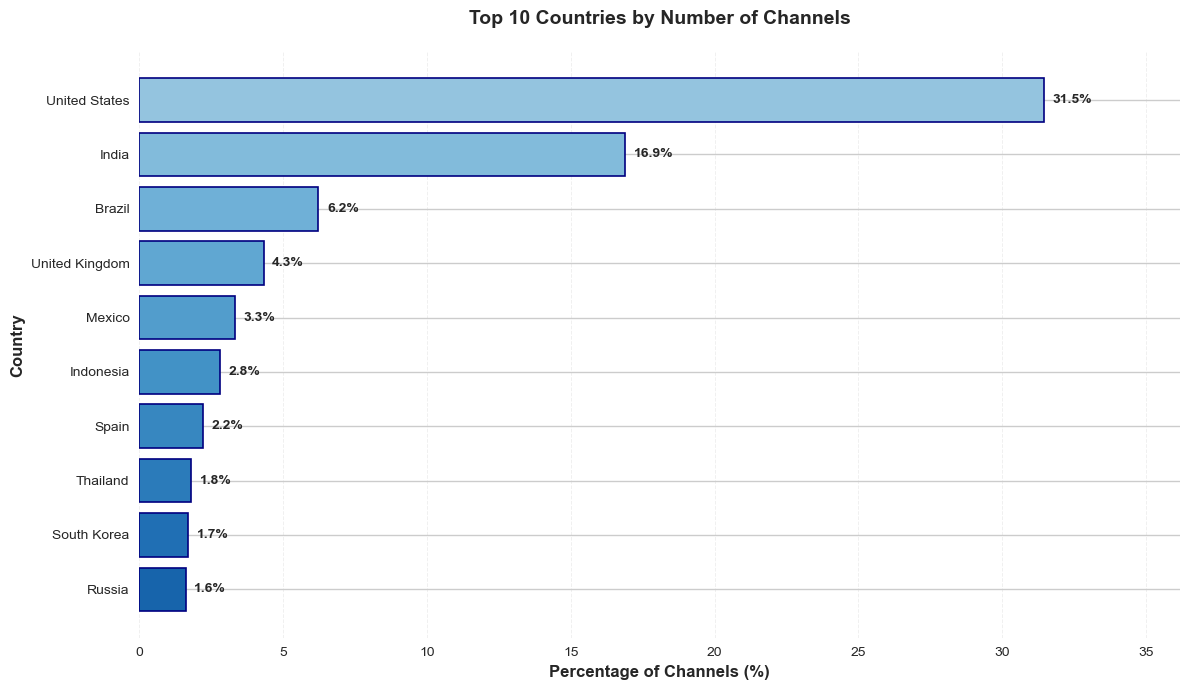

In [16]:
def plot_horizontal_bar(data, column_name, title, xlabel, ylabel):
    """
    Creates a professional horizontal bar chart with gradient colors.
    
    Parameters:
    -----------
    data : DataFrame
        DataFrame containing the data to plot (must have 'percentage' column)
    column_name : str
        Name of the column to use for percentage values
    title : str
        Title of the chart
    xlabel : str
        Label for X axis
    ylabel : str
        Label for Y axis
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    
    # Set Seaborn style for a more modern look
    sns.set_style("whitegrid")
    
    # Define custom colors (blue gradient)
    colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(data)))
    
    # Create figure with larger size
    plt.figure(figsize=(12, 7))
    
    # Create horizontal bar chart
    bars = plt.barh(data.index, 
                    data[column_name],
                    color=colors,
                    edgecolor='navy',
                    linewidth=1.2)
    
    # Add values on the bars
    for i, value in enumerate(data[column_name]):
        plt.text(value + 0.3, i, f'{value:.1f}%', 
                 va='center', fontsize=10, fontweight='bold')
    
    # Customize axes
    plt.xlabel(xlabel, fontsize=12, fontweight='bold')
    plt.ylabel(ylabel, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold', pad=20)
    
    # Invert Y axis to show highest at the top
    plt.gca().invert_yaxis()
    
    # Add subtle grid only on X axis
    plt.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
    
    # Adjust X axis limits to make room for labels
    plt.xlim(0, data[column_name].max() * 1.15)
    
    # Improve layout
    plt.tight_layout()
    
    # Show plot
    plt.show()


# Example 2: Top Countries
plot_horizontal_bar(
    data=country_counts,
    column_name="percentage",
    title="Top 10 Countries by Number of Channels",
    xlabel="Percentage of Channels (%)",
    ylabel="Country"
)

### Insights from Country Distribution

The geographic distribution shows a strong concentration of top YouTube channels in a small number of countries. The United States alone accounts for nearly one-third of all channels, while the United States and India together represent almost half of the dataset.

Despite India's significantly larger population, the United States maintains a higher concentration of top channels, suggesting that factors such as monetization infrastructure, language reach, and advertising markets play a critical role in channel scalability.

Although the platform is globally accessible, the results indicate structural advantages for creators operating in specific countries and languages, reinforcing geographic inequality in large-scale content success.


## 7. Data Transformation and Feature Engineering

To enable more meaningful analysis, key numerical features were transformed to reduce skewness, improve interpretability, and support fair comparisons across channels.
Due to the highly skewed nature of platform metrics, logarithmic transformations were applied to core numerical variables.



In [17]:

log_features = [
    "subscribers",
    "video_views",
    "uploads",
    "lowest_yearly_earnings",
    "highest_yearly_earnings"
]

for col in log_features:
    df[f"log_{col}"] = np.log10(df[col] + 1) # +1 avoids log(0)


### Effect of Log Transformation

The comparison below illustrates how logarithmic transformation improves distribution symmetry and visualization clarity.


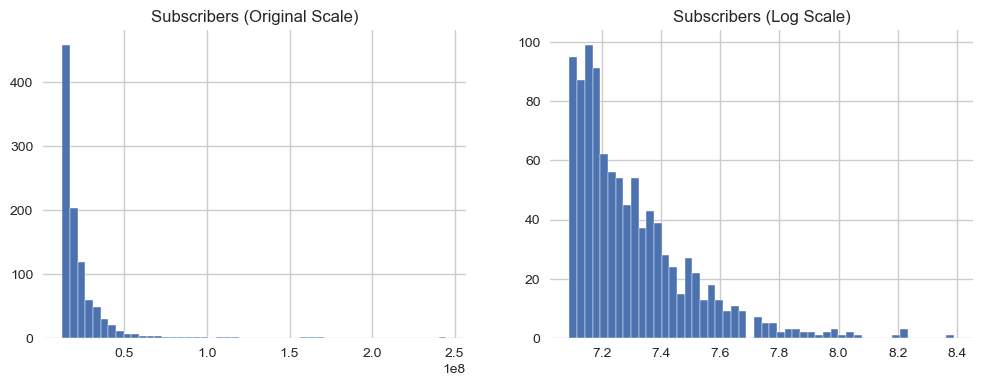

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df["subscribers"], bins=50)
axes[0].set_title("Subscribers (Original Scale)")

axes[1].hist(df["log_subscribers"], bins=50)
axes[1].set_title("Subscribers (Log Scale)")

plt.show()


## 7.1 Making Derived Metrics
Derived metrics such as average yearly earnings and views per upload provide more interpretable indicators of channel performance efficiency.


In [19]:
df["avg_yearly_earnings"] = (
    df["lowest_yearly_earnings"] + df["highest_yearly_earnings"]
) / 2
df["views_per_upload"] = df["video_views"] / df["uploads"]


In [20]:
df[[
    "subscribers",
    "log_subscribers",
    "avg_yearly_earnings",
    "views_per_upload"
]].describe().T


,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
log_subscribers,995.0,7.303628e+00,1.952803e-01,7.089905e+00,7.161368e+00,7.247973e+00,7.390935e+00,8.389166e+00
avg_yearly_earnings,995.0,3.762036e+06,7.329103e+06,0.000000e+00,2.772000e+05,1.379750e+06,3.877550e+06,8.680000e+07
views_per_upload,990.0,inf,NaN,0.000000e+00,2.370093e+06,8.433499e+06,3.717517e+07,inf


Data Filtering Note

Channels with zero uploads were excluded from analyses involving 
`views_per_upload`, as this metric is undefined in such cases.

This filtering step reduced the dataset size but ensured numerical 
stability and meaningful comparisons across channels.


In [21]:
df[df["views_per_upload"].isin([np.inf, -np.inf])].shape




(38, 35)

In [22]:
df[df["uploads"] == 0].shape


(43, 35)

In [23]:
df["views_per_upload"] = df["views_per_upload"].replace([np.inf, -np.inf], np.nan)


In [24]:
df = df.dropna(subset=["views_per_upload"])
df[[
    "subscribers",
    "log_subscribers",
    "avg_yearly_earnings",
    "views_per_upload"
]].describe().T


,count,mean,std,min,25%,50%,75%,max
subscribers,952.0,2.289706e+07,1.741508e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.442500e+07,2.450000e+08
log_subscribers,952.0,7.302522e+00,1.945510e-01,7.089905e+00,7.161368e+00,7.247973e+00,7.387834e+00,8.389166e+00
avg_yearly_earnings,952.0,3.931960e+06,7.448201e+06,0.000000e+00,3.924250e+05,1.487650e+06,4.090312e+06,8.680000e+07
views_per_upload,952.0,4.334350e+08,2.393801e+09,0.000000e+00,2.190180e+06,7.651218e+06,2.933301e+07,3.068634e+10


## 7.2 Comparing Total Video Views and Estimated Yearly Earnings

Total video views represent the overall reach and content consumption of a channel, while estimated yearly earnings reflect its monetization performance.

In this section, we compare these two metrics to investigate whether channels with higher view counts necessarily generate higher revenue, focusing only on channels with valid earnings to avoid distortions caused by non-monetizable or institutional accounts.


In [25]:
# Filter channels with valid earnings
df_monetizable = df[df['avg_yearly_earnings'] > 0].copy()

# Select top 10 channels by total video views
top_10_by_views = (
    df_monetizable
    .sort_values(by='video_views', ascending=False)
    .head(10)
    [['youtuber', 'video_views', 'subscribers', 'avg_yearly_earnings']]
)

top_10_by_views


,youtuber,video_views,subscribers,avg_yearly_earnings
0,T-Series,2.280000e+11,245000000,57600000.0
3,Cocomelon - Nursery Rhymes,1.640000e+11,162000000,50350000.0
4,SET India,1.480000e+11,159000000,46500000.0
15,Sony SAB,1.010000e+11,83000000,42300000.0
6,ýýý Kids Diana Show,9.324704e+10,112000000,18650000.0
8,Like Nastya,9.047906e+10,106000000,1223400.0
11,WWE,7.742847e+10,96000000,18200000.0
9,Vlad and Niki,7.718017e+10,98900000,14800000.0
21,Zee TV,7.313905e+10,70500000,43500000.0
26,Colors TV,6.151091e+10,64600000,30300000.0


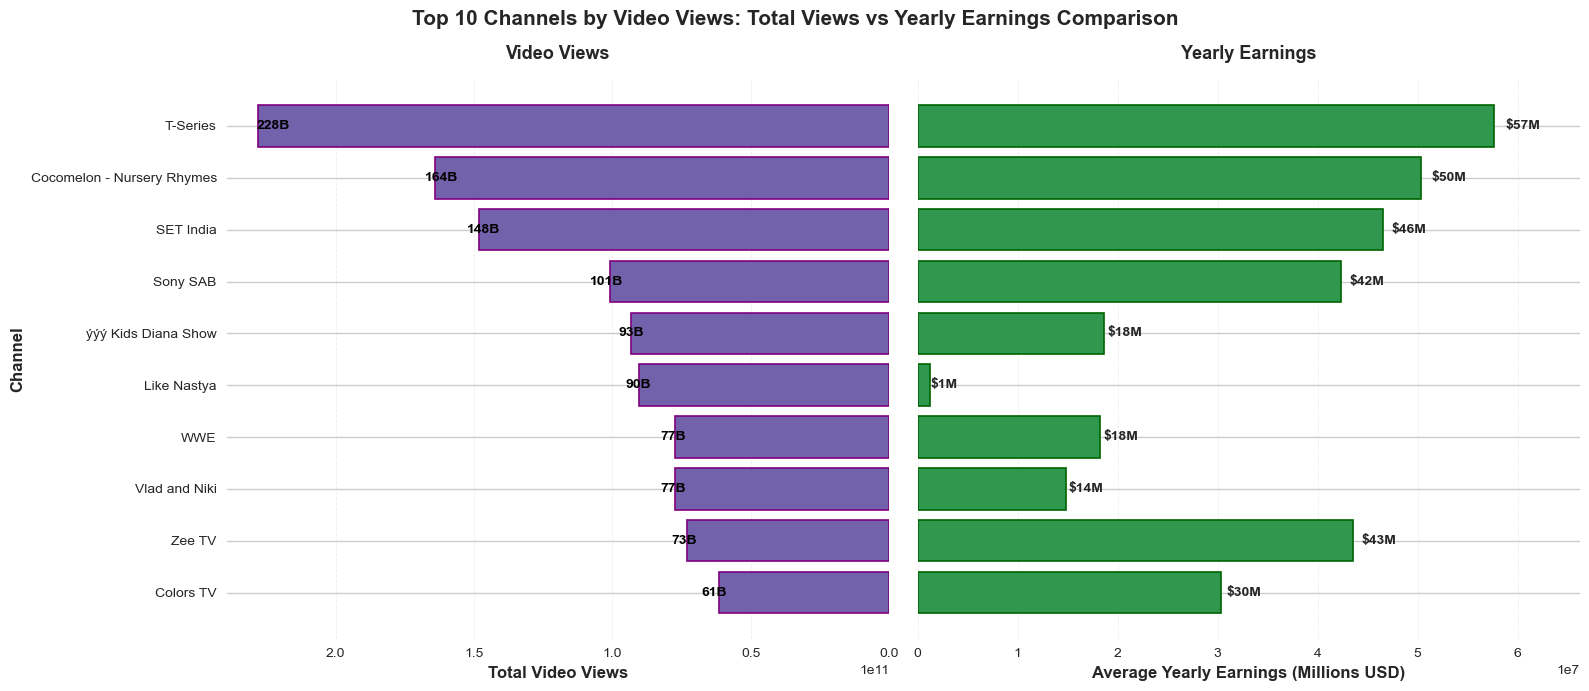

In [26]:
# Prepare data
top_10_views_comparison = top_10_by_views.set_index('youtuber')

sns.set_style("whitegrid")

# Create figure with larger size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Define colors
color1 = plt.cm.Purples(0.7)
color2 = plt.cm.Greens(0.7)

# Plot video views (left chart)
bars1 = ax1.barh(top_10_views_comparison.index, 
                 top_10_views_comparison['video_views'],
                 color=color1,
                 edgecolor='purple',
                 linewidth=1.2)

# Add values on bars (video views) - convert to billions/millions
for i, value in enumerate(top_10_views_comparison['video_views']):
    if value >= 1_000_000_000:
        formatted_value = f'{int(value/1_000_000_000)}B'
    else:
        formatted_value = f'{int(value/1_000_000)}M'
    ax1.text(value * 0.95, i, formatted_value, 
            va='center', ha='right', fontsize=10, fontweight='bold', color='black')

ax1.set_xlabel('Total Video Views', fontsize=12, fontweight='bold')
ax1.set_title('Video Views', fontsize=13, fontweight='bold', pad=15)
ax1.invert_xaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)

# Plot earnings (right chart)
bars2 = ax2.barh(top_10_views_comparison.index, 
                 top_10_views_comparison['avg_yearly_earnings'],
                 color=color2,
                 edgecolor='darkgreen',
                 linewidth=1.2)

# Add values on bars (earnings) - convert to millions
for i, value in enumerate(top_10_views_comparison['avg_yearly_earnings']):
    formatted_value = f'${int(value/1_000_000)}M'
    ax2.text(value * 1.02, i, formatted_value, 
            va='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Average Yearly Earnings (Millions USD)', fontsize=12, fontweight='bold')
ax2.set_title('Yearly Earnings', fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
ax2.set_xlim(0, top_10_views_comparison['avg_yearly_earnings'].max() * 1.15)

# Set Y axis label only on left chart
ax1.set_ylabel('Channel', fontsize=12, fontweight='bold')

# Invert Y axis to show highest at top
ax1.invert_yaxis()

# Main title
fig.suptitle('Top 10 Channels by Video Views: Total Views vs Yearly Earnings Comparison', 
             fontsize=15, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

### Key Findings

- Channels with extremely high total video views do not always present the highest yearly earnings.
- The relationship between views and earnings is positive but not linear, indicating differences in monetization efficiency.
- Some channels achieve relatively high earnings with fewer total views, suggesting stronger CPMs, audience targeting, or alternative revenue strategies.


## Conclusion

This exploratory data analysis examined the relationship between subscriber count, total video views, and estimated yearly earnings among the top YouTube channels worldwide.

The analysis showed that while subscribers and total views are important indicators of reach and popularity, they do not directly translate into higher revenue. Channels with similar audience sizes can present significantly different earnings, highlighting the impact of content type, audience behavior, and monetization strategy.

Additionally, the presence of institutional or platform-owned channels with extremely high subscriber and view counts but negligible earnings reinforced the importance of filtering data based on business relevance. Excluding non-monetizable channels was essential to avoid distorted interpretations.

Overall, this project demonstrates that YouTube performance cannot be evaluated using a single metric. A comprehensive analysis requires combining reach, engagement, and financial indicators, as well as understanding the limitations and biases of the data. These insights emphasize the importance of critical thinking and domain knowledge in data-driven decision-making.
